In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import reader1 as rd
import utilerias as utls
from torch.utils.tensorboard import SummaryWriter
import PIL.Image
# Llamamos a la función antes de ejecutar el script
utls.eliminar_archivos_registro("logs/lstm")
from torchvision.transforms import ToTensor

In [2]:
writer = SummaryWriter('logs/lstm')
DATOS = 'Datos históricos COMI 3ene16-31dic2020 semanal.csv'
cierre = rd.leer_archivo(DATOS).astype(float)
c_entrenamiento = np.array(cierre[:int(len(cierre) * 0.7)])

#Se convierte en un arreglo bidimensional
c_entrenamiento = np.reshape(c_entrenamiento, (c_entrenamiento.shape[0], 1))

In [3]:
from sklearn.preprocessing import MinMaxScaler

m_m_s = MinMaxScaler(feature_range=(0,1))
c_entrenamiento_n = m_m_s.fit_transform(c_entrenamiento)

In [4]:
time_steps = 8
N = len(c_entrenamiento_n) #182
X_entrenamiento = []
y_entrenamiento = []
for i in range(time_steps, N):
    X_entrenamiento.append(c_entrenamiento_n[i-time_steps:i, 0])#toma paquetes de 8 en 8
    y_entrenamiento.append(c_entrenamiento_n[i, 0])#se toma el elemento 8+1
X_entrenamiento, y_entrenamiento = np.array(X_entrenamiento), np.array(y_entrenamiento)
#Se le da una tercera dimension al conjunto de entradas de entrenamiento
X_entrenamiento = np.reshape(X_entrenamiento, (X_entrenamiento.shape[0], X_entrenamiento.shape[1], 1))

In [5]:
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.losses import mean_squared_error
from keras.models import load_model

red = load_model('models/LSTM.h5')

In [6]:
print(y_entrenamiento)


[0.04610616 0.10422317 0.1542038  0.15575358 0.12553274 0.14567997
 0.14645486 0.19604804 0.2305308  0.20844634 0.21193336 0.207284
 0.19294847 0.19682294 0.21425804 0.18132507 0.17512592 0.14800465
 0.15885316 0.19217358 0.18597443 0.26695079 0.29252228 0.31770632
 0.31266951 0.28903526 0.28283611 0.29949632 0.27586207 0.27469973
 0.27547462 0.33475397 0.35567609 0.3366912  0.33359163 0.3847346
 0.57109647 0.59628051 0.57458349 0.60635413 0.58465711 0.56877179
 0.64277412 0.66175901 0.67299496 0.7105773  0.7039907  0.7272375
 0.72258814 0.77179388 0.72452538 0.67105773 0.67376986 0.71445176
 0.74389771 0.72258814 0.69934134 0.73731112 0.7214258  0.71871368
 0.6741573  0.69856645 0.72103836 0.72258814 0.75629601 0.82758621
 0.83882216 0.79426579 0.78380473 0.76791941 0.78457962 0.87872917
 0.8756296  0.84889578 0.81828749 0.82681131 0.78535451 0.78922898
 0.8341728  0.81247578 0.80123983 0.80317706 0.7934909  0.76017048
 0.73537389 0.71018985 0.71212708 0.7396358  0.73614878 0.66757071

In [7]:
"""#Se entrena con un aprendizaje por reforzamiento del profesor
red = Sequential()
red.add(LSTM(units=50,return_sequences=True,input_shape=(X_entrenamiento.shape[1], 1)))#tiene un tamaño de entrada de 8 y de salida 1, input_shape = (8, 1)
red.add(Dropout(0.2))#Se apagan aleatoriamente el 20% de las neuronas de la capa anterior
red.add(LSTM(units=50,return_sequences=True))
red.add(Dropout(0.2))
red.add(LSTM(units=50,return_sequences=True))
red.add(Dropout(0.2))
red.add(LSTM(units=50))
red.add(Dropout(0.2))
red.add(Dense(units=1))
red.compile(optimizer=Adam(learning_rate=0.0001),loss='mean_squared_error')# mejor, , SGD(learning_rate=0.1)
history = red.fit(X_entrenamiento,y_entrenamiento,epochs=60,batch_size=32)#batch_size=32"""

"#Se entrena con un aprendizaje por reforzamiento del profesor\nred = Sequential()\nred.add(LSTM(units=50,return_sequences=True,input_shape=(X_entrenamiento.shape[1], 1)))#tiene un tamaño de entrada de 8 y de salida 1, input_shape = (8, 1)\nred.add(Dropout(0.2))#Se apagan aleatoriamente el 20% de las neuronas de la capa anterior\nred.add(LSTM(units=50,return_sequences=True))\nred.add(Dropout(0.2))\nred.add(LSTM(units=50,return_sequences=True))\nred.add(Dropout(0.2))\nred.add(LSTM(units=50))\nred.add(Dropout(0.2))\nred.add(Dense(units=1))\nred.compile(optimizer=Adam(learning_rate=0.0001),loss='mean_squared_error')# mejor, , SGD(learning_rate=0.1)\nhistory = red.fit(X_entrenamiento,y_entrenamiento,epochs=60,batch_size=32)#batch_size=32"

In [8]:
# Obtener la pérdida durante el entrenamiento
"""losses = history.history['loss']
print(losses)
plt.plot(range(len(losses)),losses)
plt.show()"""

"losses = history.history['loss']\nprint(losses)\nplt.plot(range(len(losses)),losses)\nplt.show()"

In [9]:
precios_reales = cierre[int(len(cierre) * 0.7):] #verdaderos valores del conjunto de prueba
precios_reales = np.reshape(precios_reales, (precios_reales.shape[0], 1)) #se le da una dimension mas

In [10]:
# dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_steps:].values

inputs_cierre = cierre[len(cierre) - len(precios_reales) - time_steps:]#toma los ultimos 86 elementos, los ultimos 8 de entrenamiento y todos los de prueba  
#print(len(cierre) - len(precios_reales) - time_steps)
inputs_cierre = np.array(inputs_cierre).reshape(-1,1)
#print(len(inputs_cierre))
#print(inputs_cierre.shape)
m_m_s_entrenamiento = MinMaxScaler(feature_range=(0,1))
inputs_cierre = m_m_s_entrenamiento.fit_transform(inputs_cierre)# se normalizan los datos usandlo los parametros que se le dieron a m_m_s
#inputs_cierre = m_m_s.transform(inputs_cierre) 
X_entrenamiento = []
for i in range(time_steps, len(inputs_cierre)):
    X_entrenamiento.append(inputs_cierre[i-time_steps:i, 0]) # setoman en paquetes de 8 
X_entrenamiento = np.array(X_entrenamiento)
X_entrenamiento = np.reshape(X_entrenamiento, (X_entrenamiento.shape[0], X_entrenamiento.shape[1], 1))#(78, 8, 1)

precios_predichos = red.predict(X_entrenamiento)
s_normalizar = precios_predichos
precios_predichos = m_m_s_entrenamiento.inverse_transform(precios_predichos)

3/3 [==============================] - 1s 4ms/step


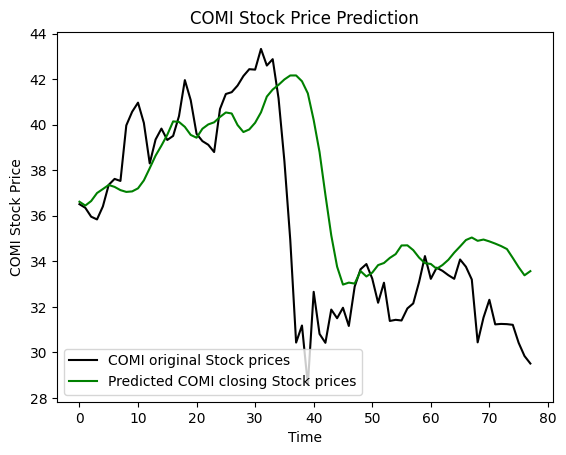

In [11]:
#La normalización funciona correctamente
plt.plot(precios_reales, color = 'black', label = 'COMI original Stock prices')
plt.plot(precios_predichos, color = 'green', label = 'Predicted COMI closing Stock prices')
plt.title('COMI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COMI Stock Price')
plt.legend()
plt.show()

In [12]:
# Guardar el modelo entrenado
# red.save('models/LSTM.h5')

In [13]:
# print(y_entrenamiento.size)
# plt.plot(y_entrenamiento)
# plt.show()

In [14]:
# ts_cierre_s_pred = c_entrenamiento_n

# loss_m = []
# for epoch in range(100):  # Número de épocas
#     ts_cierre_s_pred = c_entrenamiento_n[:time_steps]#se obtienen los primeros time_steps(8) elementos del trainig set
#     loss = []
#     X_train_c_pred = []
#     # print(f"grtrt: {ts_cierre_s_pred}")
#     for i in range(time_steps, N):
#         # Obtener las características y la etiqueta actual
#         x_actual = ts_cierre_s_pred[i-time_steps:i,0]
#         X_train_c_pred.append(x_actual)
#         x_actual = x_actual.reshape(1,time_steps,1)

#         y_actual = np.array([y_entrenamiento[i-time_steps]])

#         print(f"x_actual: {x_actual}")
#         print(f"y_actual: {y_actual}")
        
#         # Entrenar el modelo con las nuevas características y la etiqueta real
#         #loss.append(red.train_on_batch(x_actual, y_actual))

#         # Predicción del modelo
#         #prediccion = red.predict(x_actual)#.reshape(1,1,1)
#         prediccion = red(x_actual)
        
#         # Agregar la predicción a las características para el siguiente paso
#         # print(ts_cierre_s_pred)
#         print(f"prediccion: {prediccion}")
#         ts_cierre_s_pred = np.concatenate([ts_cierre_s_pred, prediccion])



#     # print(f"mean: {np.mean(np.array(loss))}")
#     # loss_m.append(np.mean(np.array(loss)))
#     X_train_c_pred = np.array(X_train_c_pred)
#     X_train_c_pred = np.reshape(X_train_c_pred, (X_train_c_pred.shape[0], X_train_c_pred.shape[1], 1))
#     history = red.fit(X_train_c_pred, y_entrenamiento, epochs=1, batch_size=32)
#     loss = history.history['loss']
#     loss_m.append(loss)
#     loss_m.append(mean_squared_error(c_entrenamiento_n,ts_cierre_s_pred[:,0]))

In [15]:
from keras.callbacks import Callback
from keras import backend as K

class CustomLearningRateScheduler(Callback):
    def __init__(self, initial_lr, decay_factor):
        super(CustomLearningRateScheduler, self).__init__()
        self.initial_lr = initial_lr
        self.decay_factor = decay_factor
        self.iteration = 0  # Contador de iteraciones
        self.lote_designado = 1

    def on_batch_begin(self, batch, logs=None):
        print(f"loss en el callback: {logs['loss']}, batch {batch}, lote_designado {self.lote_designado}")
        if (logs['loss'] <= 0.01 and batch == self.lote_designado):
            self.lote_designado = self.lote_designado + 1
            self.decay_factor = self.decay_factor  * 0.8
            print(f">>nuevo factor: {self.decay_factor*0.8}")
        #lr = self.initial_lr * (self.decay_factor ** self.iteration)
        lr = self.initial_lr / (1 + self.decay_factor * self.iteration)
        print(f"lr: {lr}, batch: {batch}")
        if (logs['epoca'] == 1):
            writer.add_scalar("Learning Rate en cada batch: ",lr,batch)
        #print(red.summary())
        K.set_value(red.optimizer.lr, lr)
        self.iteration += 1
    
    def reset(self):
        K.set_value(red.optimizer.lr, self.initial_lr)
        self.iteration = 0
        print("Se resetea")

In [16]:

red.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')#SGD(learning_rate=1e-3)

# Definir el callback con la función de la tasa de aprendizaje
lr_callback = CustomLearningRateScheduler(initial_lr=0.01, decay_factor=0.5)#0.9
lr_callback.reset()
ts_cierre_s_pred = c_entrenamiento_n
sub_epocas = 1
t_lote = 1

loss_m = []
print(f"y_entrenamiento: {y_entrenamiento}")
for epoca in range(10):  # Número de épocas
    ts_cierre_s_pred = c_entrenamiento_n[:time_steps] #:8 se toman los primeros 8 elementos del conjunto de entrenamiendo predictivo 
    ts_cierre_s_pred_post_entreno = c_entrenamiento_n[:time_steps]
    loss = []
    n_ejemplar = 1
    n_lote = 1
    x_lote = []
    # print(f"grtrt: {ts_cierre_s_pred}")
    for i in range(0,len(y_entrenamiento)):#time_steps+1
        print(i)
        # Obtener las características y la etiqueta actual
        ejemplar = ts_cierre_s_pred[i:i+time_steps,0]
        print(ejemplar.reshape(1,time_steps,1))

        x_lote.append(ejemplar)

        # Predicción del modelo 
        #prediccion = red.predict(x_actual)#.reshape(1,1,1)
        prediccion = red(ejemplar.reshape(1,time_steps,1))
        
        # Agregar la predicción a las características para el siguiente paso
        # print(ts_cierre_s_pred)
        print(f"ejemplar: {ejemplar}")
        print(f"y: {np.array( y_entrenamiento[i])}")
        print(f"Predicción : { prediccion}")
        ts_cierre_s_pred = np.concatenate([ts_cierre_s_pred, prediccion])
        

        if(n_ejemplar == t_lote):
            
            #print(f"y: {np.array( y_entrenamiento[i-t_lote+1:i+1]).reshape(t_lote,1)}")
            
            #print(f"x_lote: {x_lote}")
            lr = float(red.optimizer.lr)
            print(f"Lr que voy a aplicar en el lote: {n_lote} es {lr}")
            print(f"lote que voy a entrenar: {np.array(x_lote)}")
            print(f"verdaderas salidas: {np.array( [y_entrenamiento[i-t_lote+1:i+1]]).shape}")
            print(f"PERDIDAAAA antes: {red.test_on_batch(np.array(x_lote),np.array( [y_entrenamiento[i-t_lote+1:i+1]]))}")
            train = red.train_on_batch(np.array(x_lote), np.array( [y_entrenamiento[i-t_lote+1:i+1]]))
            
            # print(f"train: {train}")
            loss.append(train)#np.array(y_entrenamiento[i:i+t_lote])
            prediccion_post_entrenamiento = red(ejemplar.reshape(1,time_steps,1))
            print(f"Predicción post entrenamiento : { prediccion_post_entrenamiento}")
            print(f"PERDIDAAAA despues: {red.test_on_batch(np.array(x_lote),np.array( [y_entrenamiento[i-t_lote+1:i+1]]))}")
            #ts_cierre_s_pred_post_entreno = np.concatenate([ts_cierre_s_pred_post_entreno, prediccion])
            lr_callback.on_batch_begin(n_lote, logs={'loss': train, 'epoca': epoca+1})  # Llamada al callback en cada lote
            #red.optimizer.lr =
            x_lote = []
            n_ejemplar = 0
            
            n_lote = n_lote + 1
            
        n_ejemplar = n_ejemplar+1
        print(">>>>>>>>>>>>>>>Fin lote ")

        # Entrenar el modelo con las nuevas características y la etiqueta real
        # for sub_epoca in range(sub_epocas):
        #     red.train_on_batch(x_actual, y_actual)
        #     if(sub_epoca == sub_epocas - 1):
        #         loss.append(red.train_on_batch(x_actual, y_actual))
        

        
    #print(f"mean: {np.mean(np.array(loss))}")
    #loss_m.append(np.mean(np.array(loss)))
    mse = np.mean(np.array(mean_squared_error(c_entrenamiento_n,ts_cierre_s_pred[:,0])))
    loss_m.append(mse)
    writer.add_scalar(f'Perdida de entrenamiento predictivo de la red: ', mse, epoca+1)
    
    
    plot_buf = utls.gen_plot(c_entrenamiento_n,ts_cierre_s_pred,mse)

    image = PIL.Image.open(plot_buf)
    image = ToTensor()(image).unsqueeze(0)
    writer.add_image(f'Comportamiento de la serie de tiempo para la red: {0} durante el entrenamiento predictivo', image, epoca+1,dataformats='NCHW')
    lr_callback.reset()
writer.close()

Se resetea
y_entrenamiento: [0.04610616 0.10422317 0.1542038  0.15575358 0.12553274 0.14567997
 0.14645486 0.19604804 0.2305308  0.20844634 0.21193336 0.207284
 0.19294847 0.19682294 0.21425804 0.18132507 0.17512592 0.14800465
 0.15885316 0.19217358 0.18597443 0.26695079 0.29252228 0.31770632
 0.31266951 0.28903526 0.28283611 0.29949632 0.27586207 0.27469973
 0.27547462 0.33475397 0.35567609 0.3366912  0.33359163 0.3847346
 0.57109647 0.59628051 0.57458349 0.60635413 0.58465711 0.56877179
 0.64277412 0.66175901 0.67299496 0.7105773  0.7039907  0.7272375
 0.72258814 0.77179388 0.72452538 0.67105773 0.67376986 0.71445176
 0.74389771 0.72258814 0.69934134 0.73731112 0.7214258  0.71871368
 0.6741573  0.69856645 0.72103836 0.72258814 0.75629601 0.82758621
 0.83882216 0.79426579 0.78380473 0.76791941 0.78457962 0.87872917
 0.8756296  0.84889578 0.81828749 0.82681131 0.78535451 0.78922898
 0.8341728  0.81247578 0.80123983 0.80317706 0.7934909  0.76017048
 0.73537389 0.71018985 0.71212708 0.73

[0.1589248606556082, 0.15862695495753734, 0.15763485813638708, 0.1628810052503071, 0.16296689057695865, 0.16502582313176523, 0.16293438046390396, 0.1669420935764901, 0.17186400736105034, 0.17514912029899876]


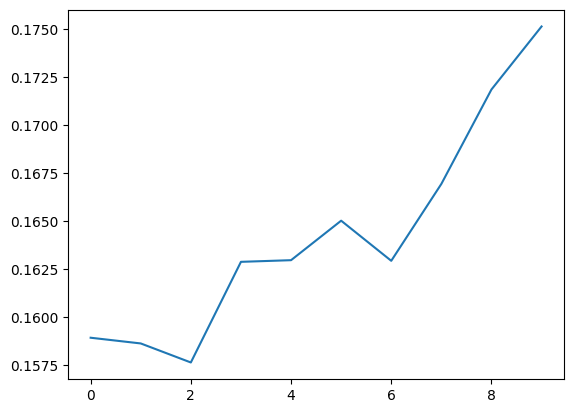

In [17]:
print(loss_m)
plt.plot(range(len(loss_m)),loss_m)
plt.show()
# losses = history.history['loss']
# print(losses)
# plt.plot(range(len(losses)),losses)
# plt.show()

In [18]:


# for i in range(time_steps, N):
#     X_entrenamiento.append(c_entrenamiento_n[i-time_steps:i, 0])#toma paquetes de 8 en 8
#     y_entrenamiento.append(c_entrenamiento_n[i, 0])#se toma el elemento 8+1

# Ahora, el modelo ha sido entrenado de manera iterativa

# print(X_entrenamiento.shape)
# print(X_entrenamiento[0,:].shape)
f_X_test_cierre = np.reshape(X_entrenamiento[0,:], (1, X_entrenamiento[0,:].shape[0], 1))
# print(f_X_test_cierre)
f_predicted_sp_cierre = red.predict(f_X_test_cierre)
print(f"shape: {precios_predichos.shape}")
f_predicted_sp_cierre = m_m_s.inverse_transform(f_predicted_sp_cierre)
print(f_X_test_cierre.reshape(8))

# Predice el conjunto de prueba usando la prediccion predictiva (ñps datos que va prediciendo)

predicted_stock_price_cierre_pred = utls.genera_prediccion_predictiva(f_X_test_cierre.reshape(8),8,78,red)
print(f"shape: {predicted_stock_price_cierre_pred.shape}")
temp = predicted_stock_price_cierre_pred
predicted_stock_price_cierre_pred = m_m_s.inverse_transform(predicted_stock_price_cierre_pred.reshape(86,1))
# input_shape_primera_capa = red.layers[0].input_shape
# print(input_shape_primera_capa[1:])

# arreglo_una_dimension = np.random.rand(8)  # Completa con tus valores reales

# # Utilizar input_shape_primera_capa en la función reshape
# arreglo_reshape = arreglo_una_dimension.reshape(1, *input_shape_primera_capa[1:])
# print(arreglo_reshape)


1/1 [==============================] - 1s 1s/step
shape: (78, 1)
[0.54539295 0.44850949 0.42344173 0.48577236 0.49051491 0.56368564
 0.57520325 0.55691057]
1/1 [==============================] - 0s 17ms/step
shape: (86,)


1/1 [==============================] - 0s 17ms/step


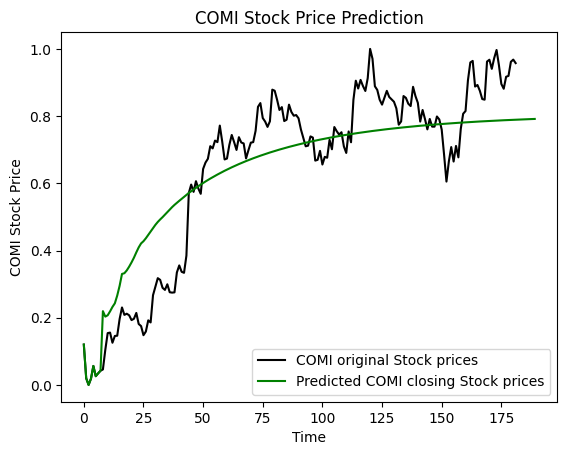

In [19]:
# Predice el conjunto de entrenamiento usando la prediccion predictiva (usando los datos que predice)

#f_X_train_cierre = np.reshape(X_entrenamiento[0,:], (1, X_entrenamiento[0,:].shape[0], 1))
f_X_train_cierre = c_entrenamiento_n[:time_steps].reshape(8)
# # print(f_X_test_cierre)
# f_predicted_t_sp_cierre = red.predict(f_X_train_cierre)
# print(f"shape: {precios_predichos.shape}")
# f_predicted_sp_cierre = m_m_s.inverse_transform(f_predicted_t_sp_cierre)
# print(f_X_test_cierre.reshape(8))

predicted_stock_price_cierre_pred_t = utls.genera_prediccion_predictiva(f_X_train_cierre,8,182,red)
# print(f"shape: {predicted_stock_price_cierre_pred_t.shape}")
# temp_t = predicted_stock_price_cierre_pred_t
# predicted_stock_price_cierre_pred = m_m_s.inverse_transform(predicted_stock_price_cierre_pred.reshape(86,1))

#Sin normalizar
plt.plot(c_entrenamiento_n, color = 'black', label = 'COMI original Stock prices')
plt.plot(predicted_stock_price_cierre_pred_t, color = 'green', label = 'Predicted COMI closing Stock prices') #ts_cierre_s_pred[:,0]
plt.title('COMI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COMI Stock Price')
plt.legend()
plt.show()

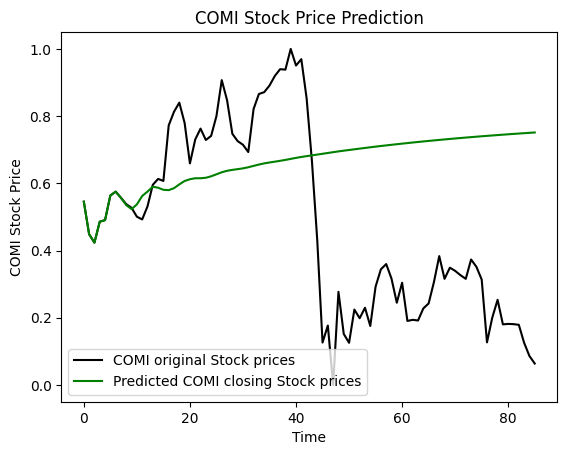

In [20]:
#Sin normalizar
plt.plot(inputs_cierre, color = 'black', label = 'COMI original Stock prices')
plt.plot(temp, color = 'green', label = 'Predicted COMI closing Stock prices')
plt.title('COMI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('COMI Stock Price')
plt.legend()
plt.show()

In [21]:
# #Sin normalizar
# plt.plot(inputs_cierre, color = 'black', label = 'COMI original Stock prices')
# plt.plot(temp, color = 'green', label = 'Predicted COMI closing Stock prices')
# plt.title('COMI Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('COMI Stock Price')
# plt.legend()
# plt.show()

In [22]:

# plt.plot(precios_reales, color = 'black', label = 'COMI original Stock prices')
# plt.plot(predicted_stock_price_cierre_pred, color = 'green', label = 'Predicted COMI closing Stock prices')
# plt.title('COMI Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('COMI Stock Price')
# plt.legend()
# plt.show()

In [23]:
import torch
import torch.nn as nn
criterion = nn.MSELoss()
perdida = criterion(torch.tensor(precios_reales),torch.tensor(precios_predichos))
print(perdida)
perdida = criterion(torch.tensor(precios_reales),torch.tensor(predicted_stock_price_cierre_pred[:78]))
print(perdida)

tensor(11.9232, dtype=torch.float64)
tensor(76.5941, dtype=torch.float64)
